Goal is to find the extremes of each EEG feature, which probably indicates issues (artifacting).

In [1]:
import numpy as np
import pandas as pd
import logging
import os
import os
import sys

log = lambda msg: logging.info(msg)

root_dir = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../..'))
sys.path.append(root_dir)


In [3]:
import stitch_pipeline_results
from importlib import reload
reload(stitch_pipeline_results)

input_dir = "C:\\dev\\play\\brainwave-data"


df_orig = stitch_pipeline_results.stitch_all_days_optimised(input_dir)
df = df_orig.copy()

  0%|          | 0/171 [00:00<?, ?it/s]

c:\dev\Brainwave-Processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (873) have mixed types. Specify dtype option on import or set low_memory=False.
  post_human_df = pd.read_csv(post_human_file)
c:\dev\Brainwave-Processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (873) have mixed types. Specify dtype option on import or set low_memory=False.
  post_human_df = pd.read_csv(post_human_file)
c:\dev\Brainwave-Processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (858) have mixed types. Specify dtype option on import or set low_memory=False.
  post_human_df = pd.read_csv(post_human_file)
c:\dev\Brainwave-Processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (873) have mixed types. Specify dtype option on import or set low_memory=False.
  post_human_df = pd.read_csv(post_human_file)
c:\dev\Brainwave-Processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (873) have mixed types. Specify dtype option on import or set low_memory=False.
  post_

# Find outliers

In [4]:
icols = [col for col in df.columns if "_norm" not in col and ('Main_eeg' in col or 'Stage' in col) and not col.endswith("_s") and not col.endswith("aa") and not col.endswith("ab") and not col.endswith("_dt") and not col.endswith("_ds") and not col.endswith("_db") and not col.endswith("_at")]
icols

['Stage',
 'StageInt',
 'Main_eeg_abspow',
 'Main_eeg_alpha',
 'Main_eeg_alphaabs',
 'Main_eeg_auc',
 'Main_eeg_beta',
 'Main_eeg_betaabs',
 'Main_eeg_fdelta',
 'Main_eeg_fdeltaabs',
 'Main_eeg_hcomp',
 'Main_eeg_higuchi',
 'Main_eeg_hmob',
 'Main_eeg_iqr',
 'Main_eeg_kurt',
 'Main_eeg_nzc',
 'Main_eeg_perm',
 'Main_eeg_petrosian',
 'Main_eeg_removed_percentage',
 'Main_eeg_sdelta',
 'Main_eeg_sdeltaabs',
 'Main_eeg_sigma',
 'Main_eeg_sigmaabs',
 'Main_eeg_skew',
 'Main_eeg_specent',
 'Main_eeg_spectral_centroid',
 'Main_eeg_std',
 'Main_eeg_theta',
 'Main_eeg_thetaabs',
 'Main_eeg_svdent']

In [5]:
import scaling
reload(scaling)
idf = df[icols]
stats = scaling.stats(idf)
stats.head()

  0%|          | 0/28 [00:00<?, ?it/s]

,Column,P10,P90,Min,Max,W_P10,W_P90,W_Min,W_Max,N1_P10,...,R_Min,R_Max,Sleep_P10,Sleep_P90,Sleep_Min,Sleep_Max,NonDeepSleep_P10,NonDeepSleep_P90,NonDeepSleep_Min,NonDeepSleep_Max
0,Main_eeg_abspow,0.049216,1.464276,0.000000e+00,NaN,0.173698,7.832457,0.000000e+00,NaN,0.036329,...,0.018738,NaN,0.045446,0.934515,0.014305,NaN,0.046189,1.656530,0.000000e+00,NaN
1,Main_eeg_alpha,0.008548,0.101754,1.757918e-10,NaN,0.006915,0.127951,1.757918e-10,NaN,0.023091,...,0.000055,NaN,0.009153,0.099550,0.000036,NaN,0.010210,0.107696,1.757918e-10,NaN
2,Main_eeg_alphaabs,0.003645,0.018989,0.000000e+00,NaN,0.006897,0.264264,0.000000e+00,NaN,0.003500,...,0.001234,NaN,0.003402,0.013467,0.000006,NaN,0.003465,0.020809,0.000000e+00,NaN
3,Main_eeg_auc,0.045532,0.250894,0.000000e+00,NaN,0.075519,0.587900,0.000000e+00,NaN,0.039041,...,0.027206,NaN,0.043813,0.193118,0.003141,NaN,0.044164,0.276033,0.000000e+00,NaN
4,Main_eeg_beta,0.002607,0.060830,6.417467e-11,NaN,0.006971,0.150080,6.417467e-11,NaN,0.013119,...,0.000082,NaN,0.002277,0.052590,0.000007,NaN,0.005072,0.065646,6.417467e-11,NaN


In [6]:
threshold = 5

# Create a new column in stats to store counts
stats['Z-Score-Above-Threshold'] = 0

# Assuming 'stats' contains column names and 'df' contains the actual data
for column in stats['Column']:  # Iterate through column names in stats DataFrame
    if column in df.columns:  # Make sure the column exists in df
        col_data = df[column]
        mean = col_data.mean() 
        std = col_data.std()
        z_score = (col_data - mean) / std
        count_above_threshold = (z_score > threshold).sum()
        
        # Update the count in the stats DataFrame
        stats.loc[stats['Column'] == column, 'Z-Score-Above-Threshold'] = count_above_threshold

stats.sort_values(by='Z-Score-Above-Threshold', ascending=False)[['Column', 'Z-Score-Above-Threshold']]


,Column,Z-Score-Above-Threshold
16,Main_eeg_removed_percentage,1113
8,Main_eeg_hcomp,1002
4,Main_eeg_beta,859
11,Main_eeg_iqr,622
23,Main_eeg_spectral_centroid,497
1,Main_eeg_alpha,408
19,Main_eeg_sigma,349
10,Main_eeg_hmob,318
12,Main_eeg_kurt,283
13,Main_eeg_nzc,196


In [7]:
[col for col in stats.columns if 'Z-Score' in col]

['Z-Score-Above-Threshold']

# Find most outlying days

In [14]:
icol = 'Main_eeg_petrosian'
col_data = df[icol]
mean = col_data.mean() 
std = col_data.std()
z_score = (col_data - mean) / std

... todo

# Investigate specific outliers

In [22]:
stats_df = pd.read_csv(input_dir + os.path.sep + "stats.csv")

In [23]:
stats_df.head()


,Unnamed: 0,Column,P10,P90,Min,Max,W_P10,W_P90,W_Min,W_Max,...,N3_Min,N3_Max,Sleep_P10,Sleep_P90,Sleep_Min,Sleep_Max,NonDeepSleep_P10,NonDeepSleep_P90,NonDeepSleep_Min,NonDeepSleep_Max
0,0,F8-M1_eeg_abspow,0.049443,0.960104,4.495007e-26,NaN,0.121262,2.252309,4.495007e-26,394.236100,...,0.075640,7.199010,0.045976,0.698546,0.019553,12.420424,0.047216,0.959616,4.495007e-26,394.236100
1,1,F8-M1_eeg_abspow_c7min_norm,-0.167526,0.552534,-3.699960e-01,NaN,-0.044704,1.126624,-3.682002e-01,23.834757,...,-0.369996,3.169724,-0.180510,0.369530,-0.369996,4.839252,-0.175165,0.524357,-3.693604e-01,23.834757
2,2,F8-M1_eeg_abspow_p2min_norm,-0.127046,0.529934,-3.299286e-01,NaN,-0.043121,1.187252,-3.259323e-01,64.120720,...,-0.289045,1.705079,-0.137635,0.352408,-0.329929,15.412325,-0.133001,0.538100,-3.299286e-01,64.120720
3,3,F8-M1_eeg_alpha,0.010792,0.118794,1.453182e-06,NaN,0.006939,0.096793,1.453182e-06,0.459236,...,0.000072,0.084815,0.012550,0.121688,0.000072,0.304906,0.012583,0.123526,1.453182e-06,0.459236
4,4,F8-M1_eeg_alpha_c7min_norm,-0.408937,0.432661,-6.548957e-01,NaN,-0.403913,0.376184,-6.548957e-01,1.737971,...,-0.644458,0.839770,-0.411396,0.442388,-0.644458,1.413406,-0.310575,0.463892,-6.548957e-01,1.737971


In [35]:
icol = 'Main_eeg_petrosian'
col_data = df[icol]
mean = col_data.mean() 
std = col_data.std()
z_score = (col_data - mean) / std
col_data.describe()


count    132428.000000
mean          1.005928
std           0.001188
min           1.000000
25%           1.005092
50%           1.005829
75%           1.006448
max           1.026045
Name: Main_eeg_petrosian, dtype: float64

In [26]:
stats = stats_df[stats_df['Column'] == icol]
stats


,Unnamed: 0,Column,P10,P90,Min,Max,W_P10,W_P90,W_Min,W_Max,...,N3_Min,N3_Max,Sleep_P10,Sleep_P90,Sleep_Min,Sleep_Max,NonDeepSleep_P10,NonDeepSleep_P90,NonDeepSleep_Min,NonDeepSleep_Max
2055,2055,Main_eeg_petrosian,1.004525,1.008085,1.0,NaN,1.005633,1.008582,1.0,1.02626,...,1.002524,1.009504,1.004427,1.006448,1.002424,1.009632,1.005011,1.008176,1.0,1.02626


In [36]:
r_p90 = float(stats['R_P90'].iloc[0])
r_p90

1.0065905

In [20]:
r = df[df['Stage'] == 'R']
r.head()

,Stage,Confidence,Epoch,Timestamp,Source,StageInt,Main_eeg_abspow,Main_eeg_abspow_c7min_norm,Main_eeg_abspow_p2min_norm,Main_eeg_alpha,...,SSPreReadyToSleep,SSAfterSleep,SSDuringReadyToSleep,SSAfterFinalWake,SSDuringSleep,SSWakeDuringSleep,SSDuringLongWake,SSMinsUntilLongWake,SSLongWakeThisNight,SSLongWakeThisNightAndIsBefore
343,R,0.561796,343,2024-07-12 01:37:48.463109016+01:00,T4-M1,4,0.049945,-0.017083,0.092167,0.080007,...,False,True,False,False,True,False,False,-1.0,False,False
344,R,0.617377,344,2024-07-12 01:38:18.463109016+01:00,F8-M1,4,0.057425,-0.069138,0.050131,0.093398,...,False,True,False,False,True,False,False,-1.0,False,False
346,R,0.720332,346,2024-07-12 01:39:18.463109016+01:00,T4-M1,4,0.047272,-0.133602,-0.151938,0.114362,...,False,True,False,False,True,False,False,-1.0,False,False
347,R,0.775985,347,2024-07-12 01:39:48.463109016+01:00,T4-M1,4,0.046862,-0.148375,-0.152663,0.087776,...,False,True,False,False,True,False,False,-1.0,False,False
348,R,0.874642,348,2024-07-12 01:40:18.463109016+01:00,T4-M1,4,0.044271,-0.155406,-0.155759,0.100448,...,False,True,False,False,True,False,False,-1.0,False,False


In [39]:
[c for c in r.columns if 'day' in c]

['dayAndNightOf']

In [45]:
over = r[r[icol] > r_p90]
x = over['dayAndNightOf'].value_counts()
x

dayAndNightOf
2024-09-01    271
2024-09-11    204
2024-12-29    159
2025-04-21    148
2024-07-22    143
             ... 
2025-02-11      2
2024-10-24      1
2024-09-20      1
2024-11-25      1
2024-11-21      1
Name: count, Length: 114, dtype: int64

In [33]:
r

,Stage,Confidence,Epoch,Timestamp,Source,StageInt,Main_eeg_abspow,Main_eeg_abspow_c7min_norm,Main_eeg_abspow_p2min_norm,Main_eeg_alpha,...,SSPreReadyToSleep,SSAfterSleep,SSDuringReadyToSleep,SSAfterFinalWake,SSDuringSleep,SSWakeDuringSleep,SSDuringLongWake,SSMinsUntilLongWake,SSLongWakeThisNight,SSLongWakeThisNightAndIsBefore
343,R,0.561796,343,2024-07-12 01:37:48.463109016+01:00,T4-M1,4,0.049945,-0.017083,0.092167,0.080007,...,False,True,False,False,True,False,False,-1.0,False,False
344,R,0.617377,344,2024-07-12 01:38:18.463109016+01:00,F8-M1,4,0.057425,-0.069138,0.050131,0.093398,...,False,True,False,False,True,False,False,-1.0,False,False
346,R,0.720332,346,2024-07-12 01:39:18.463109016+01:00,T4-M1,4,0.047272,-0.133602,-0.151938,0.114362,...,False,True,False,False,True,False,False,-1.0,False,False
347,R,0.775985,347,2024-07-12 01:39:48.463109016+01:00,T4-M1,4,0.046862,-0.148375,-0.152663,0.087776,...,False,True,False,False,True,False,False,-1.0,False,False
348,R,0.874642,348,2024-07-12 01:40:18.463109016+01:00,T4-M1,4,0.044271,-0.155406,-0.155759,0.100448,...,False,True,False,False,True,False,False,-1.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133091,R,0.788011,1232,2025-05-10 07:13:43.783482075+01:00,Fpz-M1,4,0.040774,-0.135964,-0.143647,0.075591,...,False,False,False,False,False,False,False,-1.0,False,False
133092,R,0.526976,1233,2025-05-10 07:14:13.783482075+01:00,Fpz-M1,4,0.044402,-0.134251,-0.142197,0.066185,...,False,False,False,False,False,False,False,-1.0,False,False
133093,R,0.731900,1234,2025-05-10 07:14:43.783482075+01:00,Fpz-M1,4,0.042342,-0.132776,-0.141760,0.061674,...,False,False,False,False,False,False,False,-1.0,False,False
133094,R,0.529648,1235,2025-05-10 07:15:13.783482075+01:00,Fpz-M1,4,0.029794,-0.131255,-0.142130,0.066019,...,False,False,False,False,False,False,False,-1.0,False,False


In [12]:
import notebooks.Util.DayAndNightOfFinder
reload(notebooks.Util.DayAndNightOfFinder)
import convert
reload(convert)

ts = '2024-09-18 06:54:44.539987087+01:00'
day_and_night = notebooks.Util.DayAndNightOfFinder.day_and_night_of(ts)
full_dir, just_dir = notebooks.Util.DayAndNightOfFinder.day_and_night_of_dir(input_dir, day_and_night)
raw, input_file_without_ext, mne_filtered = convert.load_mne_file(log, full_dir + "/raw.fif")

Opening raw data file C:\dev\play\brainwave-data\2024-09-17-21-33-14/raw.fif...
Isotrak not found
    Range : 0 ... 8687920 =      0.000 ... 34751.680 secs
Ready.
Reading 0 ... 8687920  =      0.000 ... 34751.680 secs...


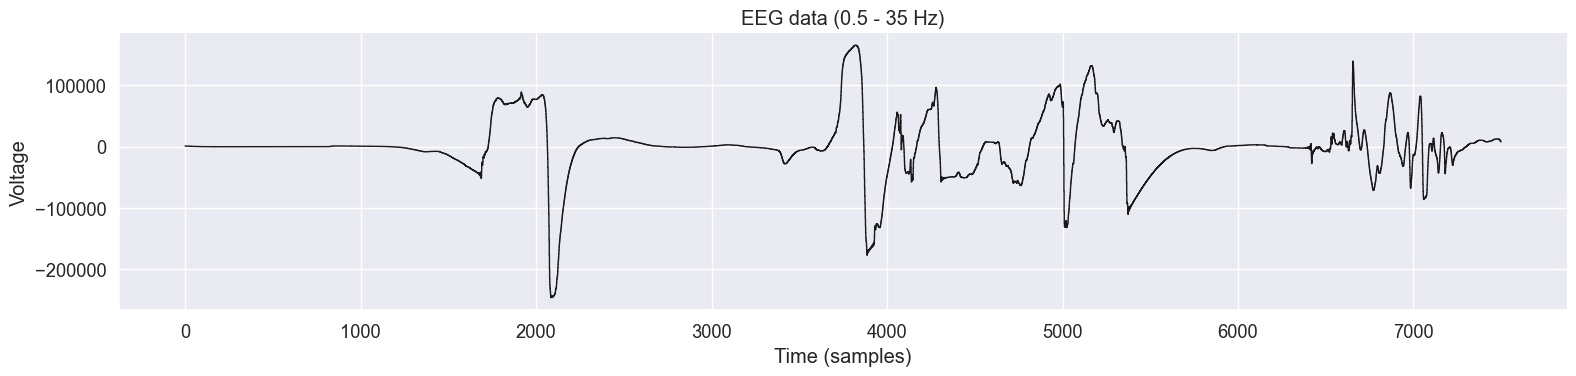

In [13]:
import notebooks.Util.DrawEpochs
reload(notebooks.Util.DrawEpochs)

epoch = notebooks.Util.DrawEpochs.get_epoch(mne_filtered, 1123)
notebooks.Util.DrawEpochs.plot_eeg_data(epoch)